IMPORTS

In [12]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

Dataset

In [13]:
score_df = pd.read_csv("Dataset//raw_data.csv")


C:\Users\Sameed\AppData\Local\Temp\ipykernel_8080\456297215.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  score_df = pd.read_csv("Dataset//raw_data.csv")


EDA

In [14]:
score_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [15]:
score_df.shape

(100000, 28)

In [16]:
score_df.dtypes


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [17]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [18]:
score_df.describe

<bound method NDFrame.describe of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...

In [19]:
# #Removing useless features

dropping = ["ID","Customer_ID","Name","SSN","Month"]
score_df.drop(dropping, inplace=True, axis=1)


In [20]:
score_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [22]:
# score_df.dtypes["Age"]
score_df["Age"] = score_df["Age"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Age"] = score_df["Age"].astype(np.int64)
score_df.dtypes["Age"]



dtype('int64')

In [23]:

# print(score_df.dtypes["Annual_Income"])
score_df["Annual_Income"] = score_df["Annual_Income"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Annual_Income"] = score_df["Annual_Income"].astype(np.float64)
score_df.dtypes["Annual_Income"]



dtype('float64')

In [24]:
score_df.dtypes["Num_of_Loan"]


score_df["Num_of_Loan"] = score_df["Num_of_Loan"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Num_of_Loan"] = score_df["Num_of_Loan"].astype(np.int64)
score_df.dtypes["Num_of_Loan"]

dtype('int64')

In [25]:
score_df.dtypes["Num_of_Delayed_Payment"]

score_df["Num_of_Delayed_Payment"] = score_df["Num_of_Delayed_Payment"].str.replace('_', '')


#Cleaned columnn and casted int
score_df["Num_of_Delayed_Payment"] = score_df["Num_of_Delayed_Payment"].astype(np.float64)
score_df.dtypes["Num_of_Delayed_Payment"]


dtype('float64')

In [27]:
score_df.dtypes["Changed_Credit_Limit"]

score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].str.replace('_', '')
score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].replace({"":None})



#Cleaned columnn and casted int
score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].astype(np.float64)
score_df.dtypes["Changed_Credit_Limit"]


dtype('float64')

In [253]:
credit_score_df.loc[:,"Delay_from_due_date":].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Delay_from_due_date       100000 non-null  int64  
 1   Num_of_Delayed_Payment    92998 non-null   object 
 2   Changed_Credit_Limit      100000 non-null  object 
 3   Num_Credit_Inquiries      98035 non-null   float64
 4   Credit_Mix                100000 non-null  object 
 5   Outstanding_Debt          100000 non-null  object 
 6   Credit_Utilization_Ratio  100000 non-null  float64
 7   Credit_History_Age        90970 non-null   object 
 8   Payment_of_Min_Amount     100000 non-null  object 
 9   Total_EMI_per_month       100000 non-null  float64
 10  Amount_invested_monthly   95521 non-null   object 
 11  Payment_Behaviour         100000 non-null  object 
 12  Monthly_Balance           98800 non-null   object 
 13  Credit_Score              100000 non-null  ob

In [247]:
score_df.loc[:,"Delay_from_due_date":].head()

,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [32]:
score_df.dtypes["Outstanding_Debt"]

score_df["Outstanding_Debt"] = score_df["Outstanding_Debt"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Outstanding_Debt"] = score_df["Outstanding_Debt"].astype(np.float64)
score_df.dtypes["Outstanding_Debt"]


dtype('float64')

In [34]:
score_df.dtypes["Amount_invested_monthly"]

score_df["Amount_invested_monthly"] = score_df["Amount_invested_monthly"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Amount_invested_monthly"] = score_df["Amount_invested_monthly"].astype(np.float64)
score_df.dtypes["Amount_invested_monthly"]


dtype('float64')

In [37]:

 score_df.dtypes["Monthly_Balance"]

score_df["Monthly_Balance"] = score_df["Monthly_Balance"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Monthly_Balance"] = score_df["Monthly_Balance"].astype(np.float64)
score_df.dtypes["Monthly_Balance"]

dtype('float64')

In [40]:
#Removed unnecsary characters and corrected data types

score_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [ ]:
credit_df[''].value_counts().plot(kind = 'bar');


---------------------------------

--------------------------

Handling Null Values

In [105]:
print("Null Values for each column:\n")

for col in score_df:
    print(f"{col} -> {credit_score_df[col].isna().sum()} ---> {credit_score_df[col].isna().sum()/len(credit_score_df[col])} %null ")

Null Values for each column:

Age -> 0 ---> 0.0 %null 
Occupation -> 0 ---> 0.0 %null 
Annual_Income -> 0 ---> 0.0 %null 
Monthly_Inhand_Salary -> 0 ---> 0.0 %null 
Num_Bank_Accounts -> 0 ---> 0.0 %null 
Num_Credit_Card -> 0 ---> 0.0 %null 
Interest_Rate -> 0 ---> 0.0 %null 
Num_of_Loan -> 0 ---> 0.0 %null 
Type_of_Loan -> 0 ---> 0.0 %null 
Delay_from_due_date -> 0 ---> 0.0 %null 
Num_of_Delayed_Payment -> 0 ---> 0.0 %null 
Changed_Credit_Limit -> 0 ---> 0.0 %null 
Num_Credit_Inquiries -> 0 ---> 0.0 %null 
Credit_Mix -> 0 ---> 0.0 %null 
Outstanding_Debt -> 0 ---> 0.0 %null 
Credit_Utilization_Ratio -> 0 ---> 0.0 %null 
Credit_History_Age -> 0 ---> 0.0 %null 
Payment_of_Min_Amount -> 0 ---> 0.0 %null 
Total_EMI_per_month -> 0 ---> 0.0 %null 
Amount_invested_monthly -> 0 ---> 0.0 %null 
Payment_Behaviour -> 0 ---> 0.0 %null 
Monthly_Balance -> 0 ---> 0.0 %null 
Credit_Score -> 0 ---> 0.0 %null 


<Axes: >

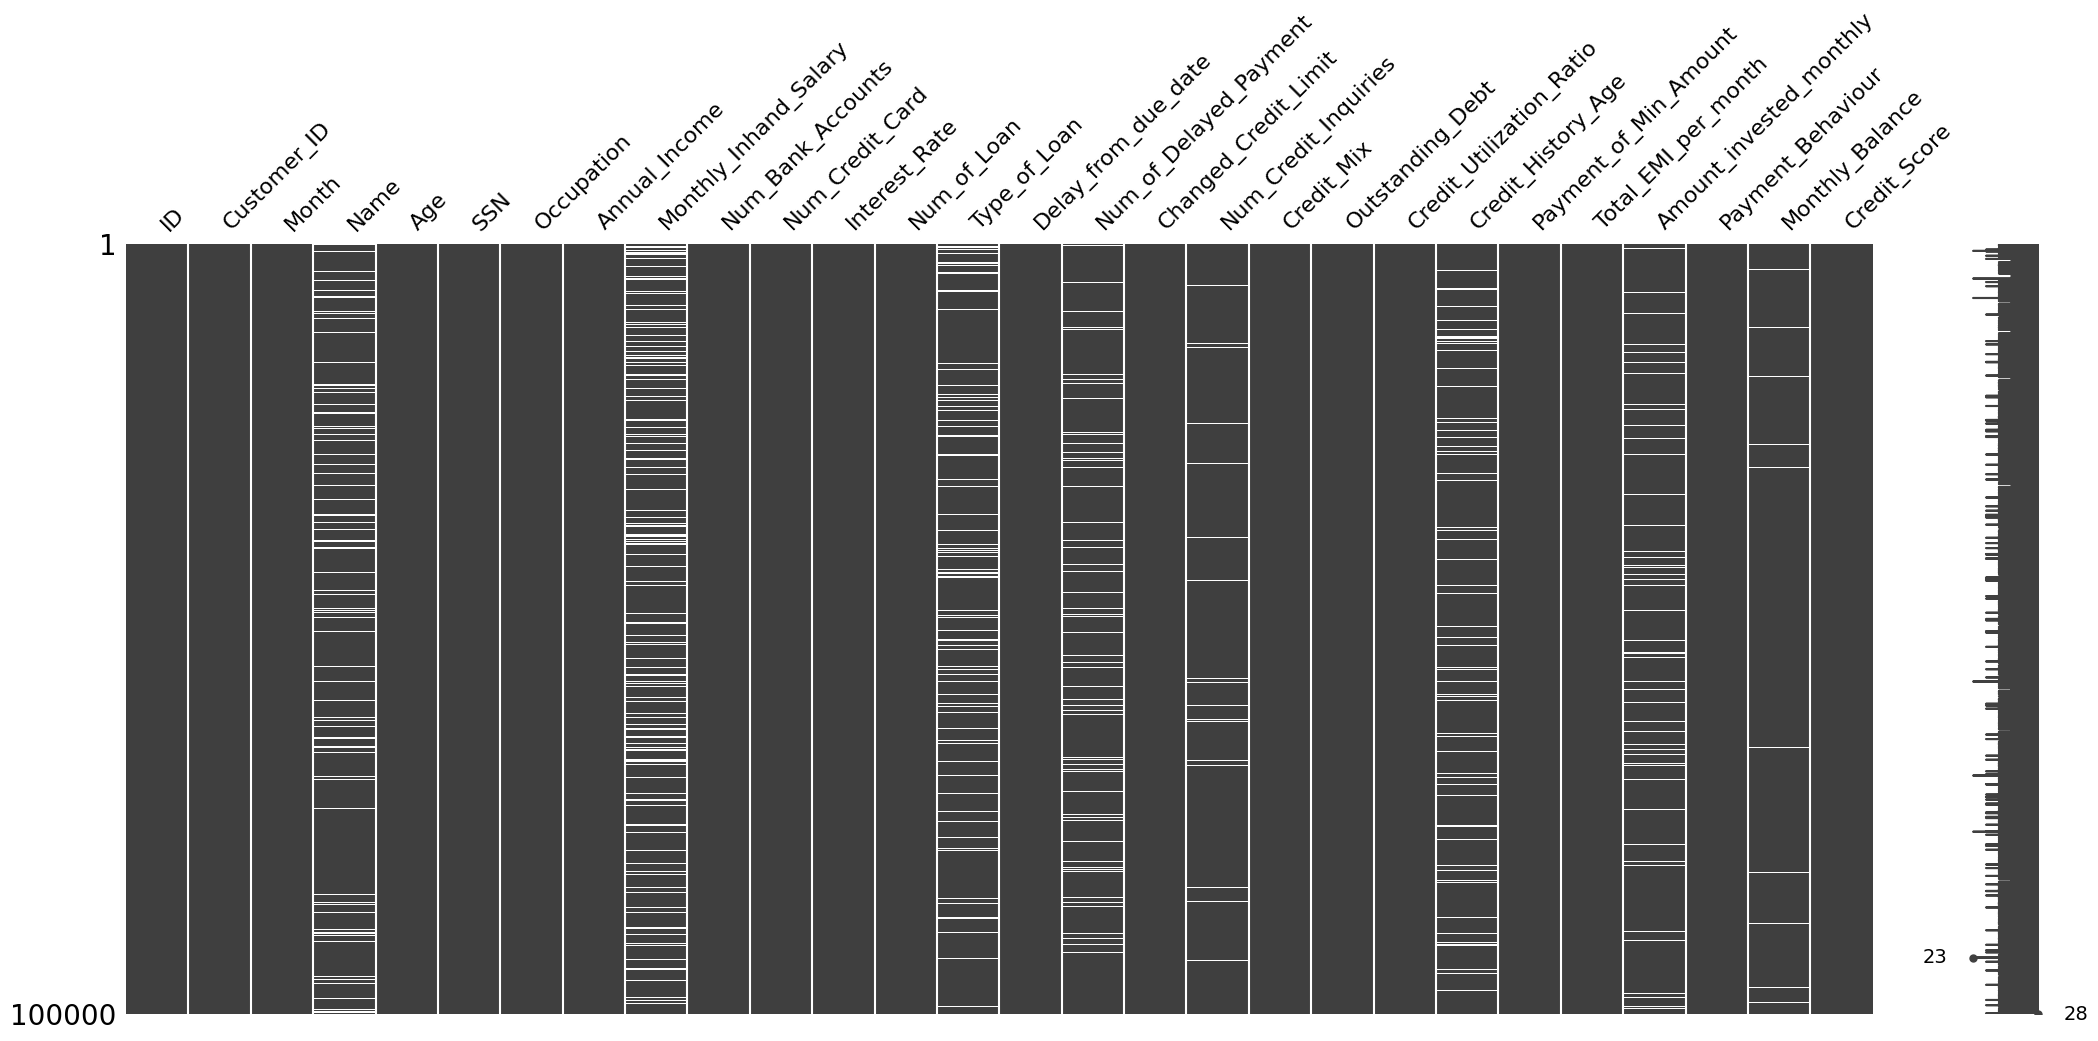

In [84]:
msno.matrix(score_df)


In [85]:

credit_score_df['Name'].fillna(credit_score_df['Name'].mode()[0], inplace = True) #Filled Nulls with mode 

credit_score_df['Monthly_Inhand_Salary'].fillna(credit_score_df['Monthly_Inhand_Salary'].mean(), inplace = True) #Filled Nulls with mean

credit_score_df['Type_of_Loan'].fillna(credit_score_df['Type_of_Loan'].mode()[0], inplace = True) #Filled Nulls with mode 

credit_score_df['Num_of_Delayed_Payment'].fillna(credit_score_df['Num_of_Delayed_Payment'].mode()[0], inplace = True) #Filled Nulls with mode 

credit_score_df['Num_Credit_Inquiries'].fillna(credit_score_df['Num_Credit_Inquiries'].mean(), inplace = True) #Filled Nulls with mean

credit_score_df['Credit_History_Age'].fillna(credit_score_df['Credit_History_Age'].mode()[0], inplace = True) #Filled Nulls with mode

credit_score_df['Amount_invested_monthly'].fillna(credit_score_df['Amount_invested_monthly'].mode()[0], inplace = True) #Filled Nulls with mode

credit_score_df['Monthly_Balance'].fillna(credit_score_df['Monthly_Balance'].mode()[0], inplace = True) #Filled Nulls with mode 


<Axes: >

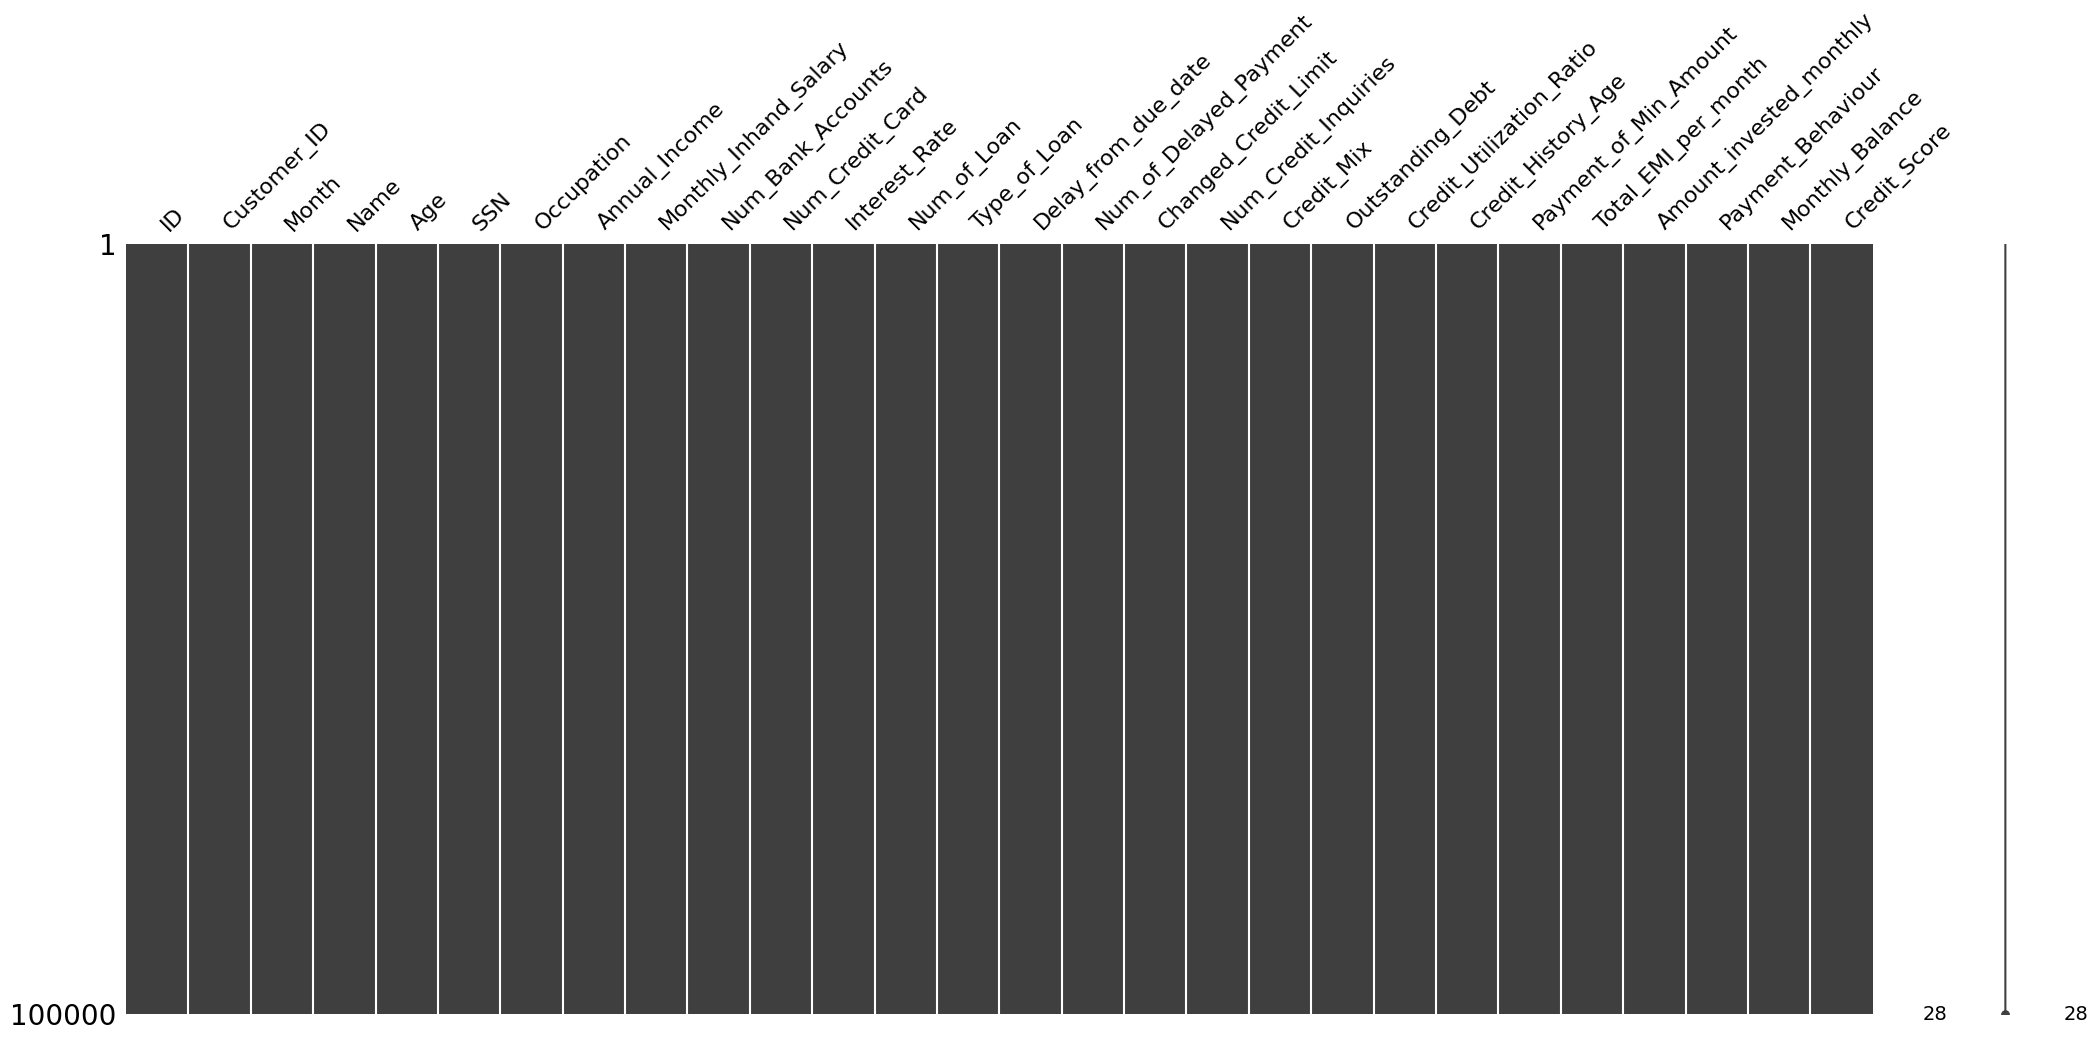

In [86]:
msno.matrix(credit_score_df)

In [87]:
credit_score_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
